In [487]:
import numpy as np
import pickle
import json
from scipy import sparse
import os
import matplotlib.pyplot as plt

In [488]:
clustering_results_path = './sigma-girl-MIIRL/data_starcraft/results_all.pkl'
clustering_results = pickle.load(open(clustering_results_path, "rb"))

In [489]:
clustering_results[0][1]

array([[5.15978039e-01, 1.11022302e-16, 4.84021961e-01],
       [5.43116015e-01, 2.18262984e-01, 2.38621001e-01],
       [5.63848363e-01, 3.63120590e-01, 7.30310473e-02]])

In [490]:
actions = pickle.load(open('./MSC/exported_replays/actions_TerranVsTerran_100_150_3.pkl', 'rb'))
states = pickle.load(open('./MSC/exported_replays/states_TerranVsTerran_100_150_[16:26].pkl', 'rb'))
rewards = pickle.load(open('./MSC/exported_replays/rewards_old_TerranVsTerran_100_150_[ 20  21 -22].pkl', 'rb'))

In [491]:
macro_action_space = ['Build', 'TrainWorker', 'TrainArmy', 'None']

terran_stat = json.load(open('./MSC/parsed_replays/Stat/Terran.json'))
id_reversed = {value: key for (key, value) in terran_stat['action_id'].items()}

In [492]:
dir_path = './MSC/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran'
num_replays = 100
paths = os.listdir(dir_path)
raw_data = {}
for i in range(num_replays):
    index = str(i)
    data = np.asarray(sparse.load_npz(os.path.join(dir_path,paths[i])).todense())
    raw_data[index] = data

In [493]:
dir_path = './MSC/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran'
paths = os.listdir(dir_path)

index = str(0)
data = np.asarray(sparse.load_npz(os.path.join(dir_path,paths[i])).todense())
data[151][16]


0.0009014829394353576

In [494]:
num_clusters =  len(clustering_results[0][0])
num_clusters
cluster_names = ["cluster " + str(i) for i in range(num_clusters)]

In [495]:
num_clusters
clustering_results[0]

(array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 1.95754701e-052,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 5.25522708e-070, 3.72108757e-034,
         0.00000000e+000, 1.37865208e-175, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 1.65202899e-052,
         0.00000000e+000, 3.98855296e-073, 0.00000000e+000,
         7.84212224e-259, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 6.62071232e-006, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+00

In [496]:
# get cluster assignments
cluster_assignments = [0] * num_replays
for i in range(num_replays):
    cluster_probs = clustering_results[0][0][:, i]
    cluster_assignments[i] = np.argmax(cluster_probs)

In [497]:
# compute cluster win/loss distributions
outcome_distributions = [[] for i in range(num_clusters)]
overall_distribution = []
for i in range(num_replays):
    index = str(i)
    outcome = str(raw_data[index][0][0])
    overall_distribution.append(outcome)
    outcome_distributions[cluster_assignments[i]].append(outcome)

In [498]:
for i in range(len(outcome_distributions)):
    print(f'Cluster {i} size: {len(outcome_distributions[i])} ')

Cluster 0 size: 0 
Cluster 1 size: 100 
Cluster 2 size: 0 


Text(0.5, 1.0, 'Win/Loss Count')

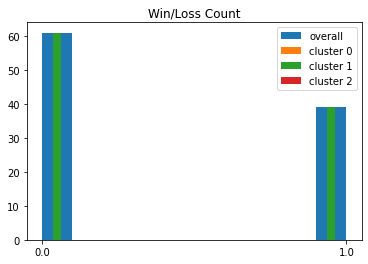

In [499]:
# visualize distributions
fig, ax = plt.subplots()
ax.hist(overall_distribution, label='overall')
ax.hist(outcome_distributions, label=cluster_names)
ax.legend()
ax.set_title("Win/Loss Count")

Text(0.5, 1.0, 'Cumulative Score at end of 150 frames')

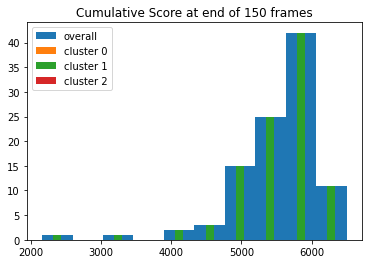

In [500]:
# compute score distributions
number_frames = 150
score_distributions = [[] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    cumulative_score = raw_data[index][number_frames - 1][2]
    score_distributions[cluster_assignments[i]].append(cumulative_score)

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(score_distributions)), label='overall')
ax.hist(score_distributions, label=cluster_names)
ax.legend()
ax.set_title("Cumulative Score at end of {} frames".format(number_frames))

Text(0.5, 1.0, 'Average  worker supply count per frame')

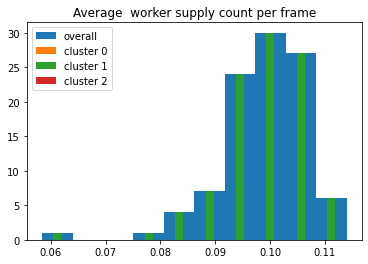

In [501]:
# make average worker supply and average army supply distributions
# army index = 4, worker index = 5

worker_distributions = [ [] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    worker_distributions[cluster_assignments[i]].append(states[str(i)][:, 5].mean())

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(worker_distributions)), label='overall')
ax.hist(worker_distributions, label=cluster_names)
ax.legend()
ax.set_title("Average  worker supply count per frame")

Text(0.5, 1.0, 'Average standardized worker supply count per frame')

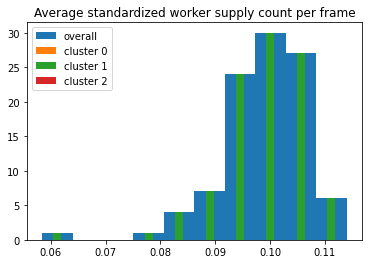

In [502]:
# make average worker supply and average army supply distributions
# army index = 4, worker index = 5

worker_distributions_new = [ [] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    worker_distributions_new[cluster_assignments[i]].append(rewards[str(i)][:, 1].mean())

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(worker_distributions_new)), label='overall')
ax.hist(worker_distributions_new, label=cluster_names)
ax.legend()
ax.set_title("Average standardized worker supply count per frame")

Text(0.5, 1.0, 'Average (normalized) army supply count per frame')

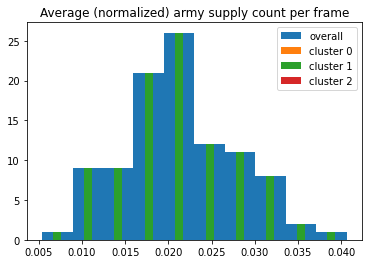

In [503]:
# make average worker supply and average army supply distributions
# army index = 4, worker index = 5

army_distributions = [ [] for i in range(num_clusters)]
for i in range(num_replays):
    index = str(i)
    army_distributions[cluster_assignments[i]].append(states[str(i)][:, 4].mean())

fig, ax = plt.subplots()
ax.hist(np.hstack(np.array(army_distributions)), label='overall')
ax.hist(army_distributions, label=cluster_names)
ax.legend()
ax.set_title("Average (normalized) army supply count per frame")

In [504]:
clustering_results[0][1]

array([[5.15978039e-01, 1.11022302e-16, 4.84021961e-01],
       [5.43116015e-01, 2.18262984e-01, 2.38621001e-01],
       [5.63848363e-01, 3.63120590e-01, 7.30310473e-02]])

In [505]:
np.mean(army_distributions[0])

/home/daniel/Projects/Python/task1-irl/env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/daniel/Projects/Python/task1-irl/env/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [506]:
#np.mean(army_distributions[2])

In [507]:
np.mean(worker_distributions[0])

nan

In [508]:
np.mean(worker_distributions[1])

0.09895937741522597

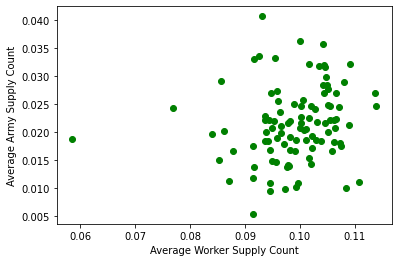

In [509]:
fig, ax = plt.subplots()
colors = ['orange', 'green', 'red', 'purple']
for i in range(num_clusters):
    ax.scatter(worker_distributions[i],army_distributions[i], c=colors[i])
#ax.scatter(np.hstack(np.array(army_distributions)), np.hstack(np.array(worker_distributions)))
plt.xlabel("Average Worker Supply Count")
plt.ylabel("Average Army Supply Count")
plt.show()

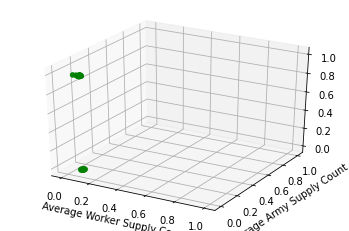

In [510]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# [float(char) for char in score_distributions[i]]
for i in range(num_clusters):
    ax.scatter(worker_distributions[i], army_distributions[i], [float(char) for char in outcome_distributions[i]] ,c=colors[i])
#ax.scatter(np.hstack(np.array(army_distributions)), np.hstack(np.array(worker_distributions)))
plt.xlabel("Average Worker Supply Count")
plt.ylabel("Average Army Supply Count")
plt.show()